In [1]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/Kletenik_UnknownProject/results/notebook_08/test'

# 01 - Get First Set of Maps 
- These are the maps you have generated yourself and want to evaluate

Enter the path to the dictionary generated by Notebook 01

In [2]:
dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/symptom_causing_lesions/roi/tmp/dataset_dict_pruned.json'
# dict_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_01/rois/tmp/dataset_dict_pruned.json'

**Option A - Import Files Using JSON File**

In [3]:
from calvin_utils.ccm_utils.npy_utils import DataLoader
data_loader = DataLoader(dict_path)

# 02 - Get Maps to Compare Against

Enter the path to the nifti files
- import_path = '/path/to/folder/holding/files'
- file_pattern = 'the_specific_naming_pattern.nii'
- If unfamiliar with use, read about Glob: https://www.geeksforgeeks.org/how-to-use-glob-function-to-find-files-recursively-in-python/

In [42]:
import_path2 = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_07/best_maps/weighted_average'
file_pattern2 = 'all_datasets_weighted_avg_r_map.nii.gz'

In [43]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
indep_var_df = GiiNiiFileImport(import_path=import_path2, file_pattern=file_pattern2).run()
indep_var_df

Attempting to import from: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_07/best_maps/weighted_average/all_datasets_weighted_avg_r_map.nii.gz


,/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_07/best_maps/weighted_average/all_datasets_weighted_avg_r_map.nii.gz
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
902624,0.0
902625,0.0
902626,0.0
902627,0.0


# 03 - Measure Similarity

Log file saved to: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/Kletenik_UnknownProject/results/notebook_08/test/stat_results.txt


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,mean_similarity,std_err
Hemichorea,0.012263,-0.003883,0.011408,-0.009587,-0.012957,-0.000875,0.003106,0.007854,0.019062,0.011240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004274,0.001586
Tremor,-0.009556,0.000477,0.001193,0.005397,0.000016,0.000713,-0.003446,-0.011965,0.007842,-0.014425,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002171,0.001937
Parkinsonism,0.003102,0.000821,-0.000436,0.025588,0.019237,0.027653,-0.028368,0.026541,0.042498,0.009665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009673,0.003871
Mania,0.009853,0.021089,0.000062,-0.020704,0.023610,0.025737,-0.042352,-0.036183,-0.069446,0.058237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.016266,0.006481
Aphasia,0.025377,0.016375,0.018832,0.027771,0.017811,0.002226,0.017575,0.021801,0.021182,0.021611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021564,0.002274
Amnesia,0.050389,-0.003371,-0.018799,-0.048958,0.000154,-0.000238,-0.018496,0.015780,0.011027,0.022106,...,0.007635,0.018875,-0.039137,-0.054652,-0.024673,-0.015699,-0.018334,-0.012687,-0.003956,0.003322
Vertigo,0.006032,-0.036255,-0.011910,0.042651,-0.033315,0.001923,0.014854,-0.001312,-0.022496,-0.081795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.004319,0.008725


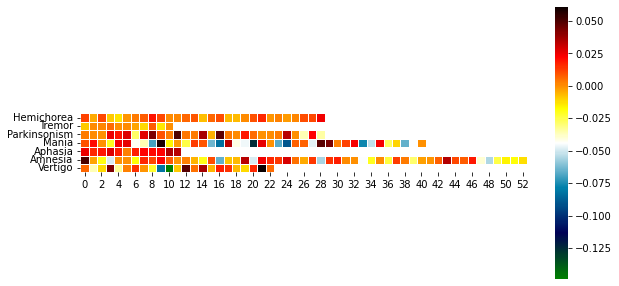

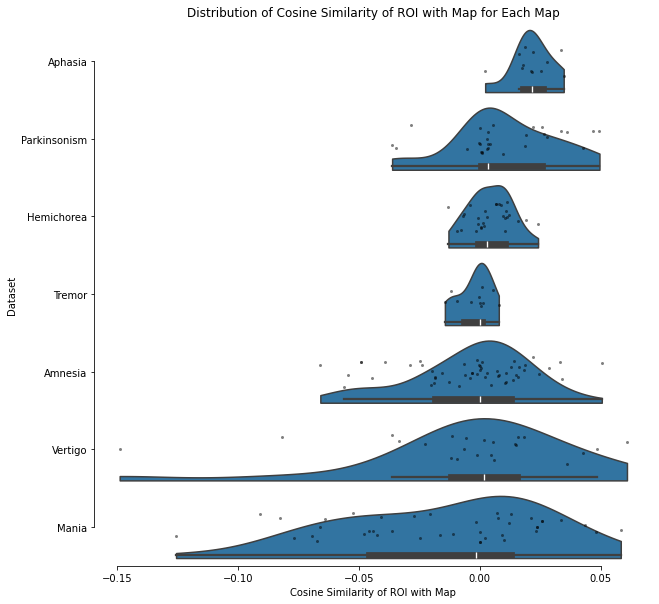

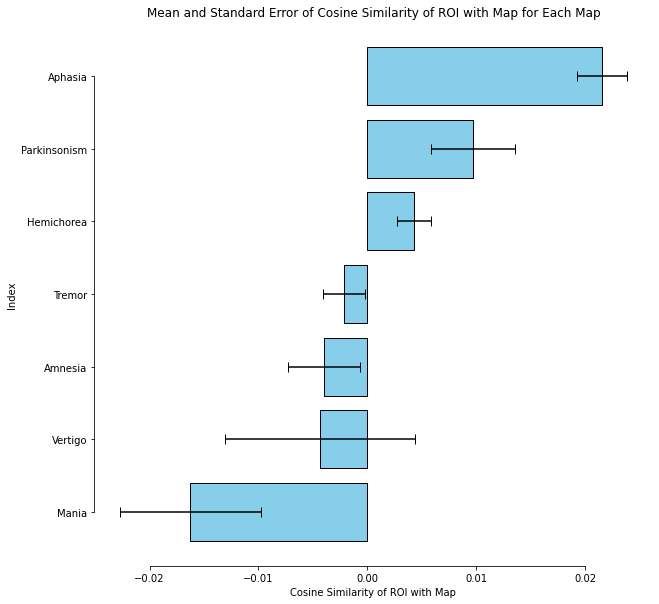

In [47]:
from calvin_utils.ccm_utils.similarity_utils import MapComparator
simtest = MapComparator(data_loader, indep_var_df, out_dir=out_dir, 
                        mask_path='/Users/cu135/hires_backdrops/MNI/MNI152_T1_2mm_brain_mask.nii', 
                        method_choice='damage', 
                        align=True, reference=None, flip_list=[])
simtest.run(similarity='cosine')